<a href="https://colab.research.google.com/github/subham129/Deep-learning/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf

In [26]:
tf.__version__

'2.15.0'

In [27]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [28]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

In [29]:
x_train.shape

(60000, 28, 28)

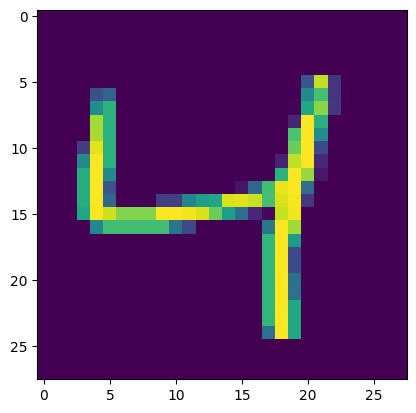

In [30]:
plt.imshow(x_train[2])

In [31]:
x_train = x_train / 255
x_test = x_test / 255

In [32]:
x_train_flatten =x_train.reshape(len(x_train),28*28)
x_test_flatten =x_test.reshape(len(x_test),28*28)

In [33]:
x_train_flatten.shape

(60000, 784)

In [34]:
clf = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

clf.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

clf.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4744 - accuracy: 0.8755
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3044 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2831 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2735 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9255


In [35]:
clf.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2661 - accuracy: 0.9255


[0.2660900950431824, 0.9254999756813049]

In [36]:
pred = clf.predict(x_test_flatten)
pred[0]

313/313 [==============================] - 0s 1ms/step


array([2.6559899e-02, 3.0282285e-07, 4.8978597e-02, 9.1795546e-01,
       1.9422993e-03, 7.7218667e-02, 1.6059585e-06, 9.9977010e-01,
       8.7144405e-02, 6.8243611e-01], dtype=float32)

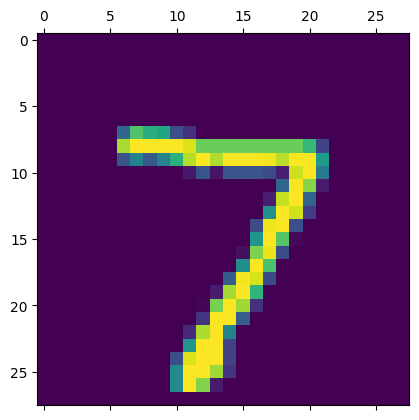

In [37]:
plt.matshow(x_test[0])

In [38]:
np.argmax(pred[0])

7

In [39]:
pred_labels = [np.argmax(i) for i in pred]
pred_labels[:5]

[7, 2, 1, 0, 4]

In [42]:
pred_labels = tf.argmax(pred, axis=1)

In [46]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=pred_labels)

Text(95.72222222222221, 0.5, 'Truth')

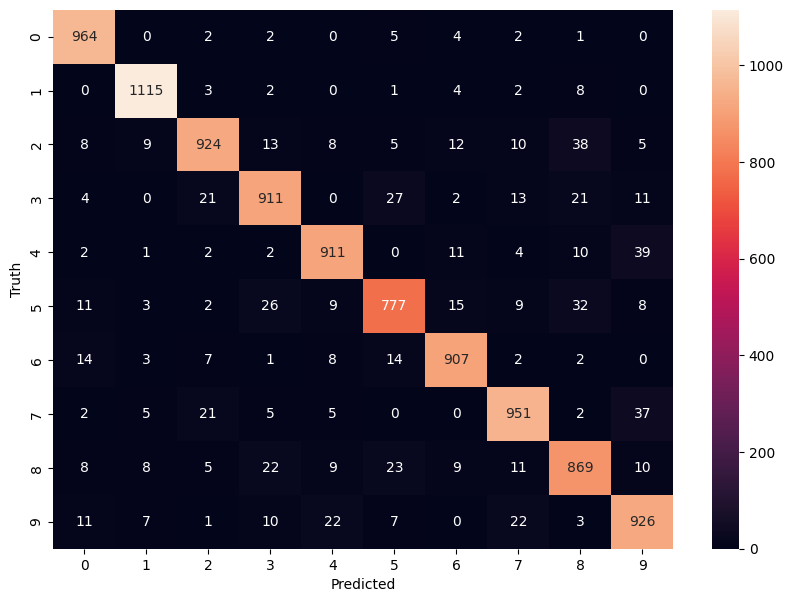

In [47]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2698 - accuracy: 0.9234
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1226 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0864 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0675 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0524 - accuracy: 0.9840


In [49]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0840 - accuracy: 0.9737


[0.08398585766553879, 0.9736999869346619]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

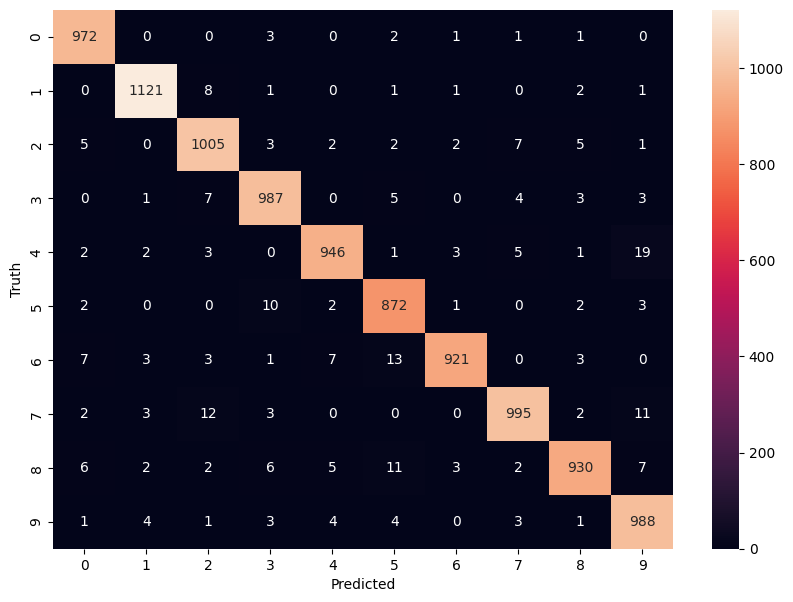

In [50]:
y_predicted = model.predict(x_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2774 - accuracy: 0.9204
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1262 - accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0890 - accuracy: 0.9725
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0669 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0541 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0421 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0355 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0298 - accuracy: 0.9905
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0239 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.020

In [52]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0849 - accuracy: 0.9768


[0.08489596843719482, 0.9768000245094299]